![alt text](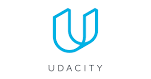 "Udacity") ![alt text](https://www.miskacademy.edu.sa/app/themes/misk-academy/images/logos.png "Misk") 




# Project: Wrangle and Analyze Data : WeRateDogs Twitter Data
## by: Almutairi, Muhanned
![alt text](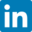 "LinkedIn profile")[LinkedIn profile](https://www.linkedin.com/in/muhanned-almutairi-5bb1a5a0/)

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering data](#Gathering)
- [Part II - Assessing data](#Assessing)
- [Part III - Cleaning data](#Cleaning)
- [Analysis](#Ana)


<a id='intro'></a>
### Introduction

Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. We will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

<a id='Gathering'></a>
#### Part I - Gathering data

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings

* The WeRateDogs Twitter archive. lets Download this file manually 

In [48]:
#read twitter archive data
twit_arch = pd.read_csv('twitter-archive-enhanced-2.csv', sep=',')

* The tweet image predictions
    i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [49]:
# Downloading and saving data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = requests.get(url)
open('image_predictions.tsv', 'wb').write(image_predictions.content)

335079

In [50]:
#read Image prediction data
image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')

Let's demonstrate using twitter API since we had applied for a developer account on twitter and we get rejected. To demonstrate, we used python transcript that was given by Udacity 

In [5]:
#twtter_api.py
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twit_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856


KeyboardInterrupt: 

Each tweet's retweet count and favorite ("like") count at minimum,  Each tweet's JSON data. Lets read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

* twitter_api.py:
    This is the Twitter API code to gather some of the required data for the project. Read the code and comments, understand how the code works, then copy and paste it into your notebook.

* tweet_json.txt:
    This is the resulting data from twitter_api.py. You can proceed with the following part of "Gathering Data for this Project"

In [51]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

Lets read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count."

In [52]:
twet_df = pd.DataFrame()

In [53]:
# Add selected variables to tweet_info DataFrame
twet_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
twet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
twet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [54]:
twet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2350 non-null   int64
 1   retweet_count   2350 non-null   int64
 2   favorite_count  2350 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


<a id='Assessing'></a>
#### Part II - Assessing Data:  Quality and Tidiness Issues

In [55]:
twit_arch.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1470,694001791655137281,NaN,NaN,2016-02-01 03:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's a Benefloof Cumberbark. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694001791...,11,10,Chester,None,None,None,None
594,798705661114773508,NaN,NaN,2016-11-16 01:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Baloo. He's expecting a fa...,7.406770e+17,4.196984e+09,2016-06-08 22:48:46 +0000,https://twitter.com/dog_rates/status/740676976...,11,10,Baloo,None,None,pupper,None
413,822872901745569793,NaN,NaN,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,13,10,None,None,None,None,puppo
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003...,9,10,None,None,None,None,None
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,13,10,Clark,None,None,None,None
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759047813...,11,10,Spencer,None,None,None,None
223,849412302885593088,NaN,NaN,2017-04-05 00:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noosh. He noticed you were in the show...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849412302...,12,10,Noosh,None,None,None,None
2094,670778058496974848,NaN,NaN,2015-11-29 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""To bone or not to bone?""\n10/10 https://t.co/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670778058...,10,10,None,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
884,760190180481531904,NaN,NaN,2016-08-01 19:07:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She's addicted to balloons. It's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760190180...,10,10,Sadie,None,None,None,None


In [56]:
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [57]:
twit_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [58]:
image_pred.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
1356,760539183865880579,https://pbs.twimg.com/media/Co36VZfWcAEN3R3.jpg,1,Samoyed,0.988013,True,malamute,0.004518,True,West_Highland_white_terrier,0.001189,True
2037,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True
397,673662677122719744,https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg,1,Labrador_retriever,0.957670,True,beagle,0.012413,True,golden_retriever,0.005689,True
1378,764259802650378240,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,German_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
1527,788908386943430656,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True
1825,835172783151792128,https://pbs.twimg.com/media/C5chM_jWAAQmov9.jpg,2,Border_collie,0.663138,True,collie,0.152494,True,Cardigan,0.035471,True
1113,724405726123311104,https://pbs.twimg.com/media/Cg2bKLAWwAA0WEm.jpg,1,golden_retriever,0.240695,True,cocker_spaniel,0.202444,True,feather_boa,0.159348,False
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,True,Cardigan,0.068698,True,basenji,0.000082,True
817,692894228850999298,https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg,1,German_short-haired_pointer,0.876977,True,bluetick,0.036615,True,basset,0.017848,True


In [59]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [60]:
image_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [61]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [62]:
twet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2350 non-null   int64
 1   retweet_count   2350 non-null   int64
 2   favorite_count  2350 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Quality
##### `twit_arch` table
- 1 - The timestamp field is in string format (object)
- 2 - Some of the rows have invalid strings in the name column, e.g. "a", "an", "in". 
- 3 - Nan value in the name column.
- 4 - There are some tweets beyond August 1st, 2017.
- 5 - Erroneous data types in the source column are not consistent..html code
- 6 - Dataset contains retweets.
- 7 - Extra characters after '&'.


##### `image_pred` table
- 8 - image prediction shows that has three level of confidence and some image is not images of dogs. 


#### Tidiness
- 1 - `image_pred` should be part of the `twit_arch` table.
- 2 - `twet_df` should be part of the `twit_arch` table as well.
- 3 - doggo, floofer, pupper, puppo columns in `twit_arch` should be combined into a single column as this is one variable that identify stage of dog.


<a id='Cleaning'></a>
#### Part III - Cleaning data

In [63]:
#Make a copy of twit_arch
clean_df= twit_arch.copy()

In [64]:
#Make a copy of image_pred
image_pred_copy = image_pred.copy()

In [65]:
#Make a copy of twet_df
twet_df_copy = twet_df.copy()

#### Tidiness #1:
`image_pred` should be part of the `twit_arch` table

##### Define
Merge `image_pred` with `twit_arch` table on 'tweet_id'

##### Code

In [66]:
clean_df = pd.merge(clean_df, image_pred_copy, on=['tweet_id'], how='left')

##### Test

In [67]:
list(clean_df.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Tidiness #2:
`twet_df` should be part of the `twit_arch` table as well

##### Define
Merge `twet_df` with `twit_arch` table on 'tweet_id'

##### Code

In [68]:
clean_df = pd.merge(clean_df, twet_df_copy,
                    on=['tweet_id'], how='left')

##### Test

In [69]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Quality # 2:
Some of the rows have invalid strings in the name column, e.g. "a", "an", "in". 

##### Define 
Replace all no valid words in the name column with the string "none"

##### Code

In [70]:
#Create a mask
names_mask = clean_df.name.str.contains('^[a-z]', regex = True)
clean_df[names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [71]:
# rename no valid words with None name
clean_df.loc[names_mask, 'name'] = "None"

##### Test

In [72]:
clean_df[names_mask].name.value_counts().sort_index()

None    109
Name: name, dtype: int64

#### Quality #5:
Erroneous data types in the source column are not consistent..html code

##### Define
Extract the string in the script

##### Code

In [73]:
clean_df['source'] = clean_df['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [74]:
clean_df.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Quality #1:
The timestamp field is in string format (object)

##### Define
Convert timestamp to datetime data type.

##### Code

In [75]:
clean_df['timestamp'] = pd.to_datetime(clean_df.timestamp)

##### Test

In [76]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Quality #4:
There are some tweets beyond August 1st, 2017.

##### Define 
Drop all tweets beyond August 1st, 2017.

##### Code

In [77]:
ts = '2017-08-01 00:00:00'
clean_df = clean_df[(clean_df['timestamp'] < ts)]

##### Test

In [78]:
(clean_df['timestamp'] > ts).value_counts()

False    2354
Name: timestamp, dtype: int64

#### Quality #6:
Dataset contains retweets.

##### Define 
Remove retweets.

##### Code

In [79]:
# Select rows where 'retweeted_status_id' is null to save to clean_df
clean_df = clean_df[clean_df['retweeted_status_id'].isnull()]

##### Test

In [80]:
clean_df.shape

(2173, 30)

#### Quality #8:
image prediction shows that has three level of confidence and some image is not images of dogs. 

##### Define
Setup the conditions for selection \
Set the choice order based on the selection conditions for predicted breed, and\
Set the choice order for confidence level based on the selection conditions\
Select the predicted breed based on the first successful condition.\
Select the predicted confidence level based on the first successful condition & Set breed as 'none' and confidence to 0 for any cases where all 3 prediction flags are False.

##### Code

In [81]:
# setup the conditions for selection
conditions = [(clean_df['p1_dog'] == True), (clean_df['p2_dog'] == True), (clean_df['p3_dog'] == True)]

In [82]:
# set the choice order based on the selection conditions for predicted breed
choices_breed = [clean_df['p1'],clean_df['p2'],clean_df['p3']]

In [83]:
# set the choice order for confidence level based on the selection conditions
choices_confidence = [clean_df['p1_conf'], clean_df['p2_conf'], clean_df['p3_conf']]

In [84]:
# select the predicted breed based on the first successful condition
clean_df['breed'] = np.select(conditions, choices_breed, default = 'none')

In [85]:
# select the predicted confidence level based on the first successful condition
clean_df['confidence'] = np.select(conditions, choices_confidence, default = 0)

##### Test

In [86]:
clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,breed,confidence
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4273.0,25394.0,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8884.0,42743.0,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9668.0,40904.0,basset,0.555712
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3217.0,20508.0,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Border_collie,0.199287,True,ice_lolly,0.193548,False,2131.0,12033.0,Appenzeller,0.341703


#### Quality #3:
Nan value in the name column.

##### Define
Replace with None name

##### Code

In [87]:
# fill nan value with 'None'
clean_df.name.fillna(value='None', inplace= True)

##### Test

In [88]:
clean_df.name.count()

2173

#### Quality #7:
Extra characters after '&'.

##### Define
Remove extra characters after '&' in `twit_arch` ['text'].

##### Code

In [89]:
clean_df['text'] = clean_df['text'].str.replace('&amp;', '&')

##### Test

In [90]:
clean_df[clean_df.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,breed,confidence


#### Tidiness #3:
doggo, floofer, pupper, puppo columns in `twit_arch` should be combined into a single column as this is one variable that identify stage of dog.

##### Define
First replace None in stage columns with empty string /
Then combine stage columns /
Then format entries with multiple dog stages.

##### Code

In [99]:
#First replace None in stage columns with empty string
clean_df.doggo.replace('None', '', inplace=True)
clean_df.floofer.replace('None', '', inplace=True)
clean_df.pupper.replace('None', '', inplace=True)
clean_df.puppo.replace('None', '', inplace=True)

In [100]:
#Then combine stage columns
clean_df['stage'] = clean_df.doggo + clean_df.floofer + clean_df.pupper + clean_df.puppo

In [101]:
#Then format entries with multiple dog stages
clean_df.loc[clean_df.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
clean_df.loc[clean_df.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
clean_df.loc[clean_df.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

##### Test

In [102]:
clean_df.stage.value_counts()

                 1829
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

#### Quality
Drop all columns that no needs further analysis and visualization in the next section

In [103]:
df= clean_df.drop(['in_reply_to_status_id',
               'in_reply_to_user_id',
              'retweeted_status_id',
              'retweeted_status_user_id',
              'retweeted_status_timestamp',
                   'pupper',
                   'doggo',
                   'floofer',
                   'puppo',
              'img_num',
               'expanded_urls',
              'p1',
               'p1_dog',
              'p1_conf',
              'p2',
              'p2_conf',
               'p2_dog',
              'p3',
              'p3_conf',
              'p3_dog'], axis=1)

In [104]:
#store the cleaned data
df.to_csv('twitter_archive_master.csv', index = False)

<a id='Ana'></a>
### Analysis

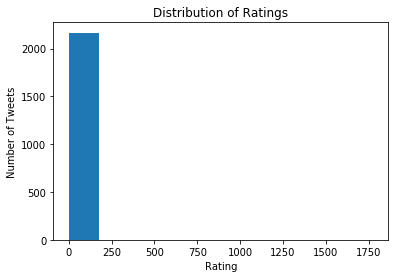

In [112]:
df['rating_numerator'].plot(kind = 'hist')
plt.ylabel('Number of Tweets')
plt.xlabel('Rating')
plt.title('Distribution of Ratings')
plt.show();

In [115]:
#Percentage of tweets with rating of 10 
rating_10 = sum(df.rating_numerator == 10)
rating_10up= sum(df.rating_numerator > 10)
rating_10_perc = round(rating_10 * 100 / df.shape[0])
rating_10up_perc = round(rating_10up * 100 / df.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10))
print("Percentage of tweets:                {}%".format(rating_10_perc))

print("Number of tweets with rating more than 10+:  {}".format(rating_10up))
print("Percentage of tweets:                {}%".format(rating_10up_perc))

Number of tweets with rating 10+:  442
Percentage of tweets:                20%
Number of tweets with rating more than 10+:  1300
Percentage of tweets:                60%


In [116]:
df.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,confidence
count,2.173000e+03,2173.000000,2173.000000,2173.000000,2173.000000
mean,7.369776e+17,13.215370,2749.780028,8737.728026,0.426538
std,6.735319e+16,47.747664,4705.577127,12254.529395,0.349532
min,6.660209e+17,0.000000,0.000000,51.000000,0.000000
25%,6.768220e+17,10.000000,604.000000,1900.000000,0.033899
50%,7.095662e+17,11.000000,1331.000000,4011.000000,0.407016
75%,7.892684e+17,12.000000,3184.000000,11018.000000,0.749368
max,8.918152e+17,1776.000000,78839.000000,131922.000000,0.999956


In [117]:
df[df.retweet_count == 78839]

,tweet_id,timestamp,source,text,rating_numerator,name,jpg_url,retweet_count,favorite_count,breed,confidence,stage
1039,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,None,https://pbs.twimg.com/ext_tw_video_thumb/74423...,78839.0,130212.0,Labrador_retriever,0.825333,doggo


In [118]:
df.jpg_url.iloc[1039]

'https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg'

![alt text](https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg "1039") 

In [119]:
df[df.favorite_count == 131922]

,tweet_id,timestamp,source,text,rating_numerator,name,jpg_url,retweet_count,favorite_count,breed,confidence,stage
413,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,13,None,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,47768.0,131922.0,Lakeland_terrier,0.196015,puppo


In [120]:
df.jpg_url.iloc[413]

'https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg'

![alt text](https://pbs.twimg.com/media/C2p_wQyXEAELtvS.jpg "413") 

In [121]:
# Set the index to be the timestamp so time is displayed properly in plots
df.set_index('timestamp', inplace=True)

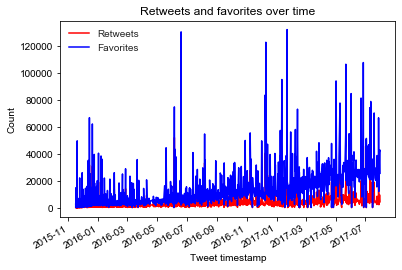

In [122]:
df['retweet_count'].plot(color = 'red', label='Retweets')
df['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

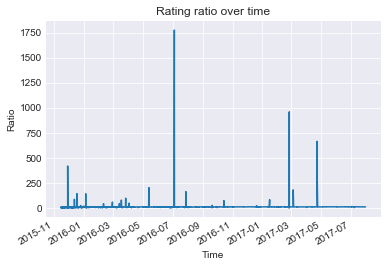

In [123]:
df['rating_numerator'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio.png')
plt.show()